In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This Notebook is not complete

# Life expectancy and Healthy life expectancy

#### Datasets 

* **lifeExpectancyAtBirth.csv** -> Life expectancy at birth, country wise mentioned in age (years).
* **HALElifeExpectancyAtBirth.csv** -> Healthy life expectancy (HALE) at birth, country wise mentioned in age(years).csv
* **WHOregionLifeExpectancAtBirth.csv** -> Life expectancy at birth, Region wise mentioned in age (years).
* **HAleWHOregionLifeExpectancy.csv** -> Healthy life expectancy at birth, region wise mentioned in age(years).
* **%HaleInLifeExpectancy.csv** -> Healthy life and life expectancy at birth with the % of HALE in life expectancy.

### Loading The Data

In [4]:
lifeExpectancy = pd.read_csv("datasets/lifeExpectancyAtBirth.csv")
healthyLifeExpectancy = pd.read_csv("datasets/HALElifeExpectancyAtBirth.csv")
WhoLifeExpectancy = pd.read_csv("datasets/WHOregionLifeExpectancyAtBirth.csv")
healthyWhoLifeExpectancy = pd.read_csv("datasets/HALeWHOregionLifeExpectancyAtBirth.csv")

In [5]:
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [6]:
healthyLifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


In [7]:
WhoLifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Africa,2019,Life expectancy at birth (years),Both sexes,64.49
1,Africa,2019,Life expectancy at birth (years),Male,62.37
2,Africa,2019,Life expectancy at birth (years),Female,66.65
3,Africa,2015,Life expectancy at birth (years),Both sexes,62.56
4,Africa,2015,Life expectancy at birth (years),Male,60.47


In [8]:
healthyWhoLifeExpectancy.head()

,Location,Period,Indicator,Dim1,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,56.04,64.49,86.897193,87
1,Africa,2019,Healthy life expectancy (HALE) at birth (years),Male,55.00,62.37,88.183422,88
2,Africa,2019,Healthy life expectancy (HALE) at birth (years),Female,57.09,66.65,85.656414,86
3,Africa,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,54.42,62.56,86.988491,87
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),Male,53.38,60.47,88.275178,88


#### Lets look at Region-wise Data first

To compare different region we take the average of each reigon for different year

In [9]:
WhoLifeExpectancy['Location'].unique()

array(['Africa', 'Americas', 'South-East Asia', 'Europe',
       'Eastern Mediterranean', 'Western Pacific'], dtype=object)

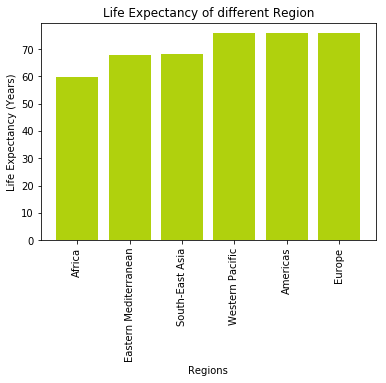

In [10]:
tempData = WhoLifeExpectancy.groupby('Location')['First Tooltip'].mean()
tempData = tempData.sort_values()
tempData = tempData.reset_index()
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.xlabel("Regions")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of different Region")
ax1.bar(x=tempData['Location'], height= tempData['First Tooltip'], color = "#b0d10d")
plt.xticks(rotation = 90)
plt.show()

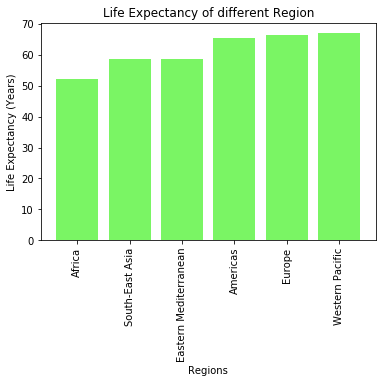

In [11]:
tempData = healthyWhoLifeExpectancy.groupby('Location')['Hale Expectency'].mean()
tempData = tempData.sort_values()
tempData = tempData.reset_index()
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.xlabel("Regions")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of different Region")
ax1.bar(x=tempData['Location'], height= tempData['Hale Expectency'], color = "#7af564")
plt.xticks(rotation = 90)
plt.show()

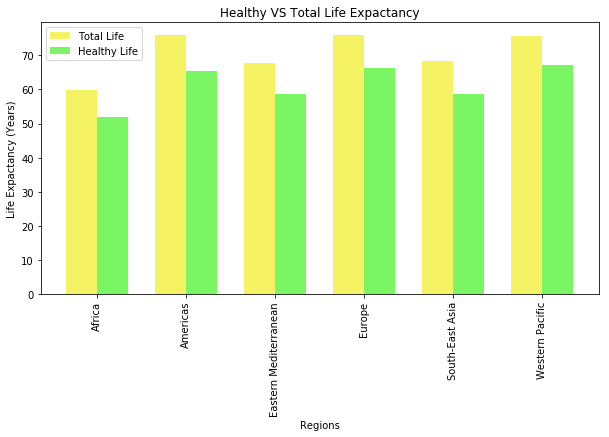

In [12]:
tempData = healthyWhoLifeExpectancy.groupby(['Location'])['Life expectany', 'Hale Expectency'].mean()
tempData = tempData.reset_index()
region = tempData.Location.unique().tolist()
fig = plt.figure(figsize=(10,5))
x_index = np.arange(len(region))
width = 0.35
plt.bar(x_index-width/2, tempData['Life expectany'], width = width, color='#f5f364')
plt.bar(x_index+width/2, tempData['Hale Expectency'], width = width, color='#7af564')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Life Expactancy (Years)")
plt.title("Healthy VS Total Life Expactancy")
plt.legend(['Total Life', 'Healthy Life'])
plt.show()

In [13]:
df

NameError: name 'df' is not defined

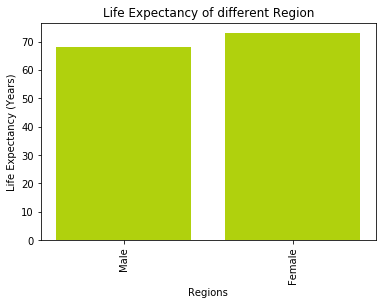

In [14]:
tempData = WhoLifeExpectancy.groupby('Dim1')['First Tooltip'].mean()
tempData = tempData.sort_values()
tempData = tempData.reset_index()
tempData.drop([1], axis = 0, inplace = True)
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.xlabel("Regions")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of different Region")
ax1.bar(x=tempData['Dim1'], height= tempData['First Tooltip'], color = "#b0d10d")
plt.xticks(rotation = 90)
plt.show()

In [15]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

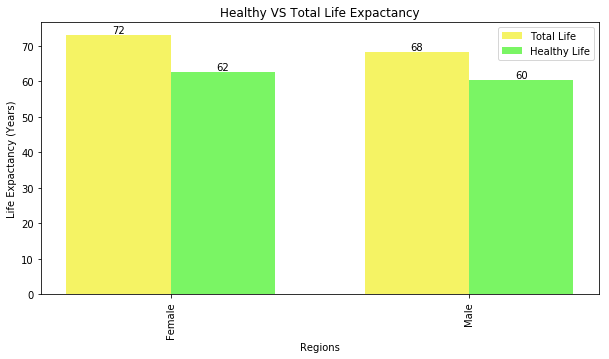

In [16]:
tempData = healthyWhoLifeExpectancy.groupby(['Dim1'])['Life expectany', 'Hale Expectency'].mean()
tempData = tempData.reset_index()
tempData.drop([0], axis = 0, inplace = True)
region = tempData.Dim1.unique().tolist()

fig = plt.figure(figsize=(10,5))
x_index = np.arange(len(region))
width = 0.35
ax = plt.subplot2grid((1,1),(0,0))
ract1 = ax.bar(x_index-width/2, tempData['Life expectany'], width = width, color='#f5f364')
ract2 = ax.bar(x_index+width/2, tempData['Hale Expectency'], width = width, color='#7af564')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Life Expactancy (Years)")
plt.title("Healthy VS Total Life Expactancy")
plt.legend(['Total Life', 'Healthy Life'])

autolabel(ract1)
autolabel(ract2)
    
plt.show()

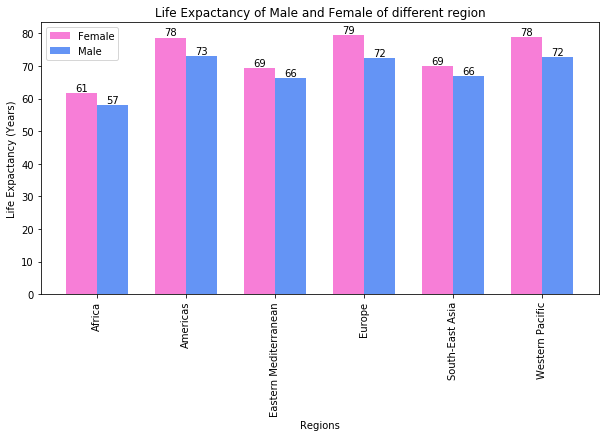

In [17]:
tempData = WhoLifeExpectancy.groupby(['Location','Dim1'])['First Tooltip'].mean()
tempData = tempData.reset_index()
region = tempData.Location.unique().tolist()
dataM = tempData[tempData['Dim1'] == 'Male']['First Tooltip']
dataF = tempData[tempData['Dim1'] == 'Female']['First Tooltip']
x_index = np.arange(len(region))
width = 0.35
fig = plt.figure(figsize=(10,5))
ax = plt.subplot2grid((1,1),(0,0))
ract1 = ax.bar(x_index-width/2, dataF, width = width, color='#f77ed7')
ract2 = ax.bar(x_index+width/2, dataM, width = width, color="#6494f5")
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Life Expactancy (Years)")
plt.title("Life Expactancy of Male and Female of different region")
plt.legend(['Female', 'Male'])

autolabel(ract1)
autolabel(ract2)

plt.show()

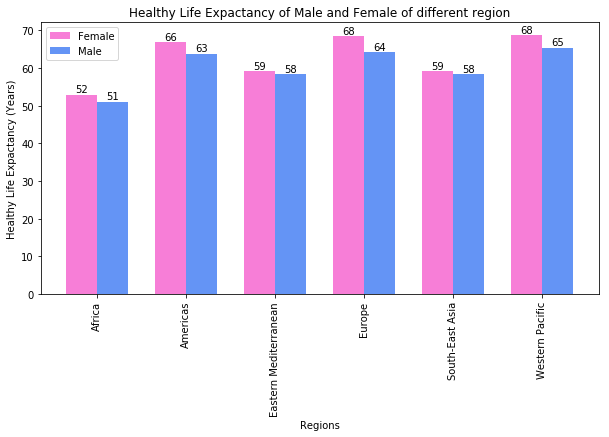

In [18]:
tempData = healthyWhoLifeExpectancy.groupby(['Location','Dim1'])['Hale Expectency'].mean()
tempData = tempData.reset_index()
region = tempData.Location.unique().tolist()
dataM = tempData[tempData['Dim1'] == 'Male']['Hale Expectency']
dataF = tempData[tempData['Dim1'] == 'Female']['Hale Expectency']
x_index = np.arange(len(region))
width = 0.35
fig = plt.figure(figsize=(10,5))
ax = plt.subplot2grid((1,1),(0,0))
ract1 = ax.bar(x_index-width/2, dataF, width = width, color='#f77ed7')
ract2 = ax.bar(x_index+width/2, dataM, width = width, color="#6494f5")
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Healthy Life Expactancy (Years)")
plt.title("Healthy Life Expactancy of Male and Female of different region")
plt.legend(['Female', 'Male'])

autolabel(ract1)
autolabel(ract2)

plt.show()

### Different Regions

In [19]:
WhoLifeExpectancy['Location'].unique()

array(['Africa', 'Americas', 'South-East Asia', 'Europe',
       'Eastern Mediterranean', 'Western Pacific'], dtype=object)

In [20]:
def getData(region):
    AfricaDataBoth = WhoLifeExpectancy[(WhoLifeExpectancy['Location'] == region) & (WhoLifeExpectancy['Dim1'] == 'Both sexes')]
    AfricaDataMan = WhoLifeExpectancy[(WhoLifeExpectancy['Location'] == region) & (WhoLifeExpectancy['Dim1'] == 'Male')]
    AfricaDataWoman = WhoLifeExpectancy[(WhoLifeExpectancy['Location'] == region) & (WhoLifeExpectancy['Dim1'] == 'Female')]
    return AfricaDataBoth, AfricaDataMan, AfricaDataWoman

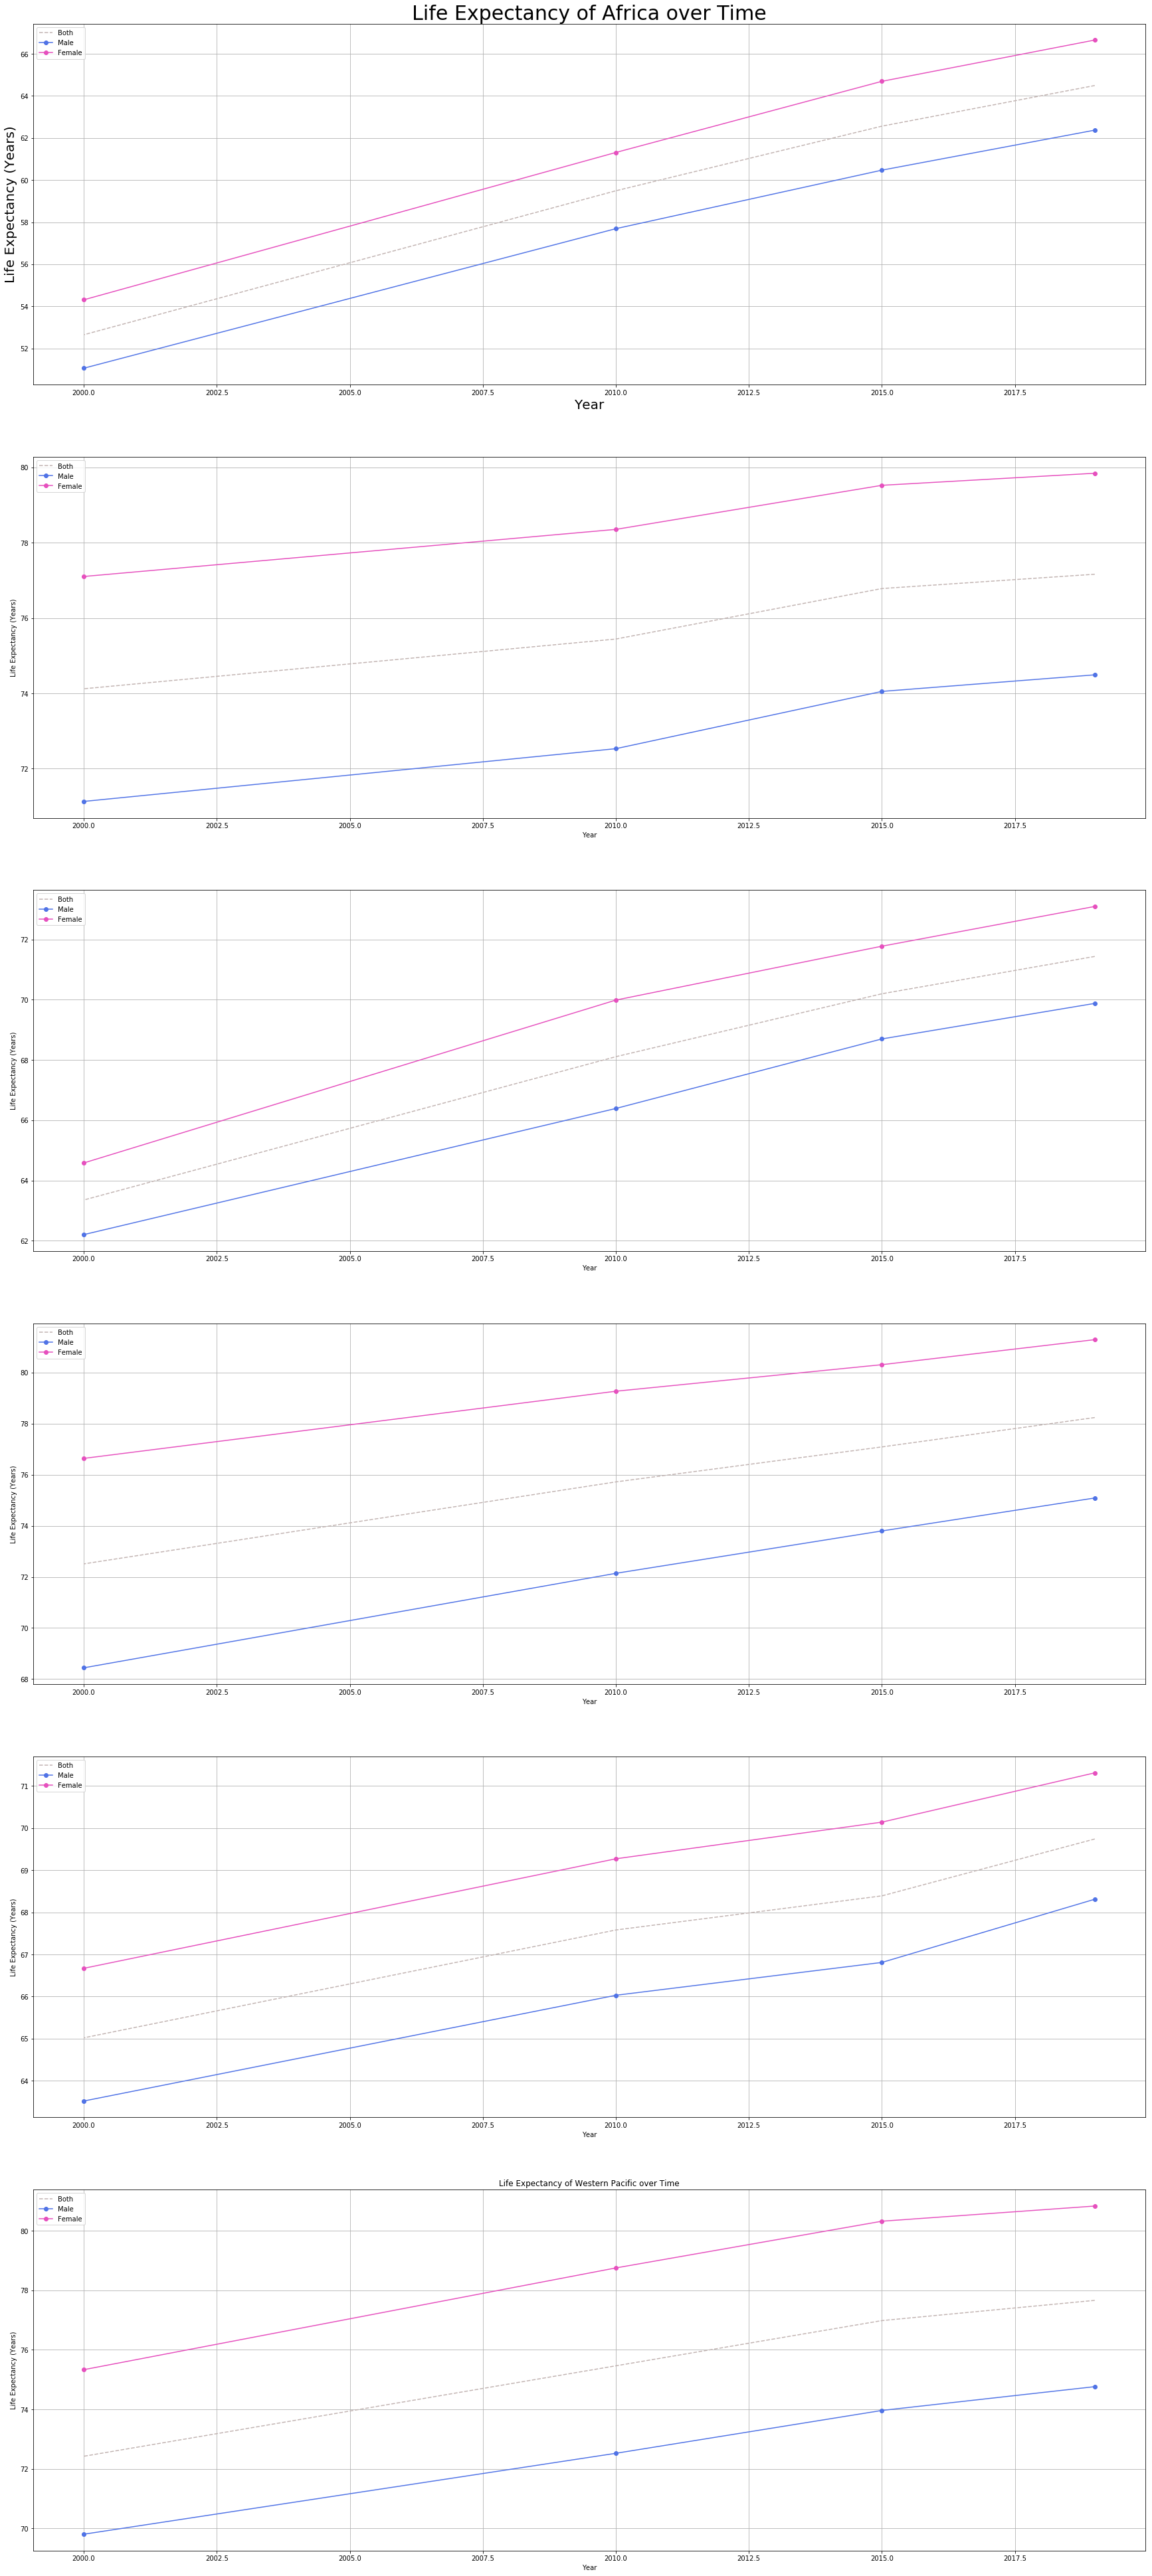

In [34]:
AfricaDataBoth, AfricaDataMan, AfricaDataWoman = getData('Africa')
AmericaDataBoth, AmericaDataMan, AmericaDataWoman = getData('Americas')
SEDataBoth, SEDataMan, SEDataWoman = getData('South-East Asia')
EUDataBoth, EUDataMan, EUDataWoman = getData('Europe')
EMDataBoth, EMDataMan, EMDataWoman = getData('Eastern Mediterranean')
WPDataBoth, WPDataMan, WPDataWoman = getData('Western Pacific')

fig = plt.figure(figsize=(30,70))

ax1 = plt.subplot2grid((6,1),(0, 0), rowspan=1, colspan=1)
plt.xlabel("Year", size=20)
plt.ylabel("Life Expectancy (Years)", size=20)
plt.title("Life Expectancy of Africa over Time", size=30)
ax1.plot(AfricaDataBoth['Period'], AfricaDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax1.plot(AfricaDataMan['Period'], AfricaDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax1.plot(AfricaDataWoman['Period'], AfricaDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)



ax2 = plt.subplot2grid((6, 1),(1,0), rowspan=1, colspan=1)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
# plt.title("Life Expectancy of America over Time")
ax2.plot(AmericaDataBoth['Period'], AmericaDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax2.plot(AmericaDataMan['Period'], AmericaDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax2.plot(AmericaDataWoman['Period'], AmericaDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)


ax3 = plt.subplot2grid((6,1),(2,0), rowspan=1, colspan=1)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
# plt.title("Life Expectancy of South-East Asia over Time")
ax3.plot(SEDataBoth['Period'], SEDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax3.plot(SEDataMan['Period'], SEDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax3.plot(SEDataWoman['Period'], SEDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)



ax4 = plt.subplot2grid((6,1),(3,0), rowspan=1, colspan=1)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
# plt.title("Life Expectancy of Europe over Time")
ax4.plot(EUDataBoth['Period'], EUDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax4.plot(EUDataMan['Period'], EUDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax4.plot(EUDataWoman['Period'], EUDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)


ax5 = plt.subplot2grid((6,1),(4,0), rowspan=1, colspan=1)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
# plt.title("Life Expectancy of Eastern Mediterranean over Time")
ax5.plot(EMDataBoth['Period'], EMDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax5.plot(EMDataMan['Period'], EMDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax5.plot(EMDataWoman['Period'], EMDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)


ax6 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy of Western Pacific over Time")
ax6.plot(WPDataBoth['Period'], WPDataBoth['First Tooltip'],linestyle = "--", color = '#c2b4b2', label='Both')
ax6.plot(WPDataMan['Period'], WPDataMan['First Tooltip'], marker='o', color = '#5073e6', label = 'Male')
ax6.plot(WPDataWoman['Period'], WPDataWoman['First Tooltip'], marker='o', color = '#e650be', label = 'Female')
plt.legend()
plt.grid(True)

plt.show()

# Different Countries

In [20]:
lifeExpectancy['Location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

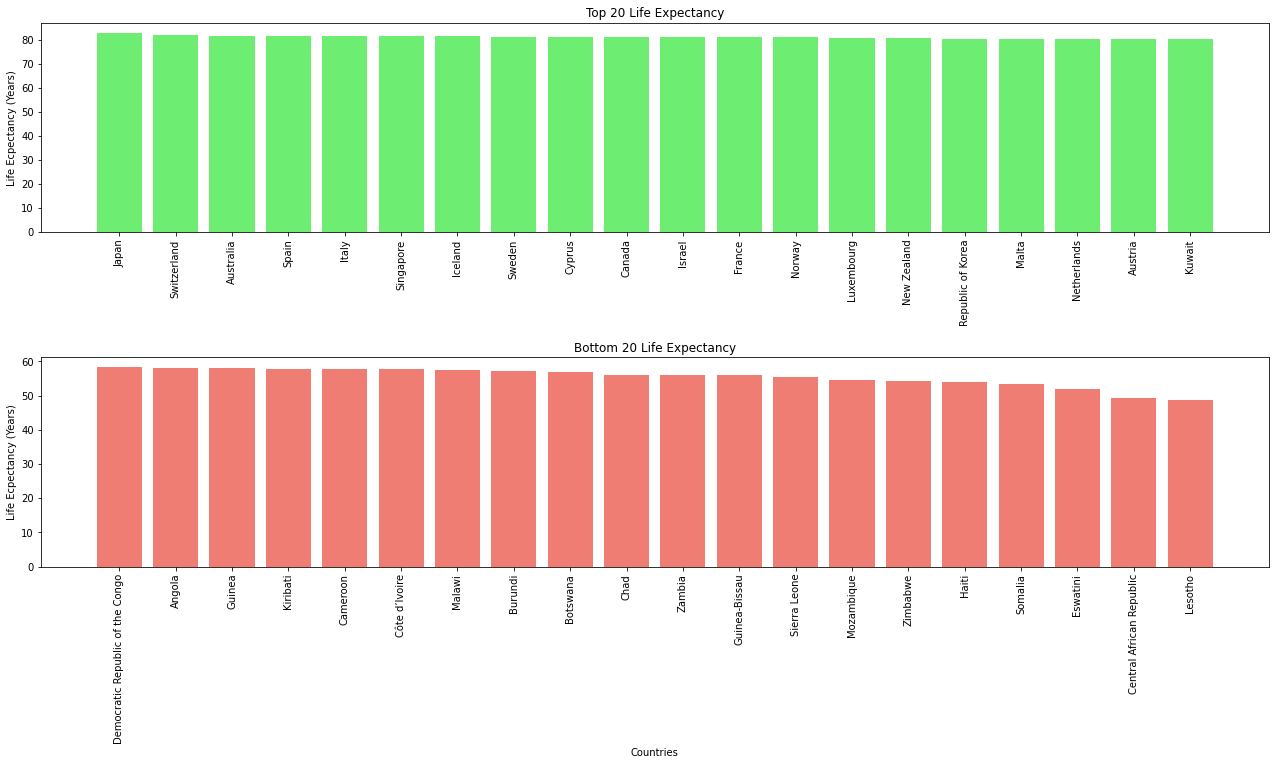

In [21]:
tempData = lifeExpectancy.groupby('Location')['First Tooltip'].mean()
tempDataTop20 = tempData.sort_values(ascending=False)[:20]
tempDataLow20 = tempData.sort_values()[:20]
tempDataTop20 = tempDataTop20.reset_index()
tempDataLow20 = tempDataLow20.reset_index()
fig = plt.figure(figsize = (22,10))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x = tempDataTop20['Location'], height = tempDataTop20['First Tooltip'], color = "#6ded71")
ax1.set_xticklabels(tempDataTop20['Location'], rotation=90)
ax1.set_ylabel("Life Ecpectancy (Years)")
ax1.title.set_text("Top 20 Life Expectancy")

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x = tempDataLow20['Location'][::-1], height = tempDataLow20['First Tooltip'][::-1], color = "#f07d73")
ax2.title.set_text("Bottom 20 Life Expectancy")

plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.ylabel("Life Ecpectancy (Years)")
plt.subplots_adjust(hspace = 0.6)
plt.show()

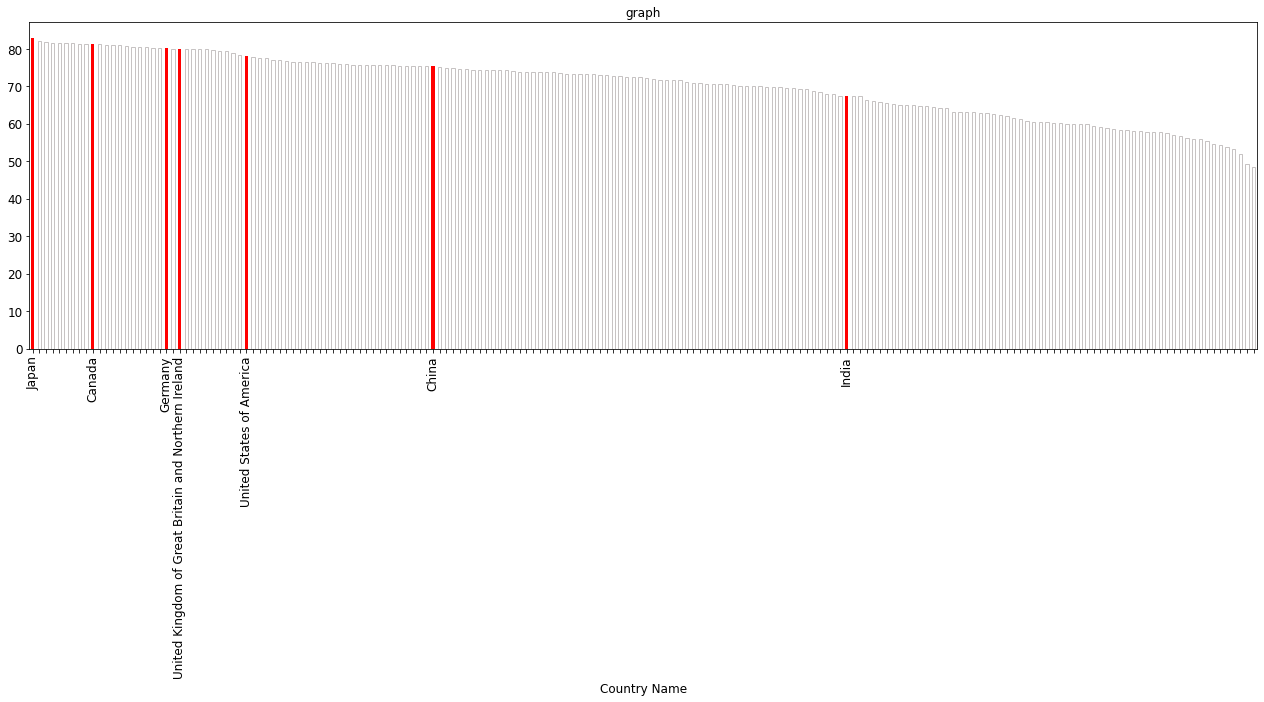

In [22]:
tempData = lifeExpectancy.groupby('Location')['First Tooltip'].mean()
tempData = tempData.sort_values(ascending=False)
tempData = tempData.reset_index()
tempData.set_index('Location',drop=True,inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

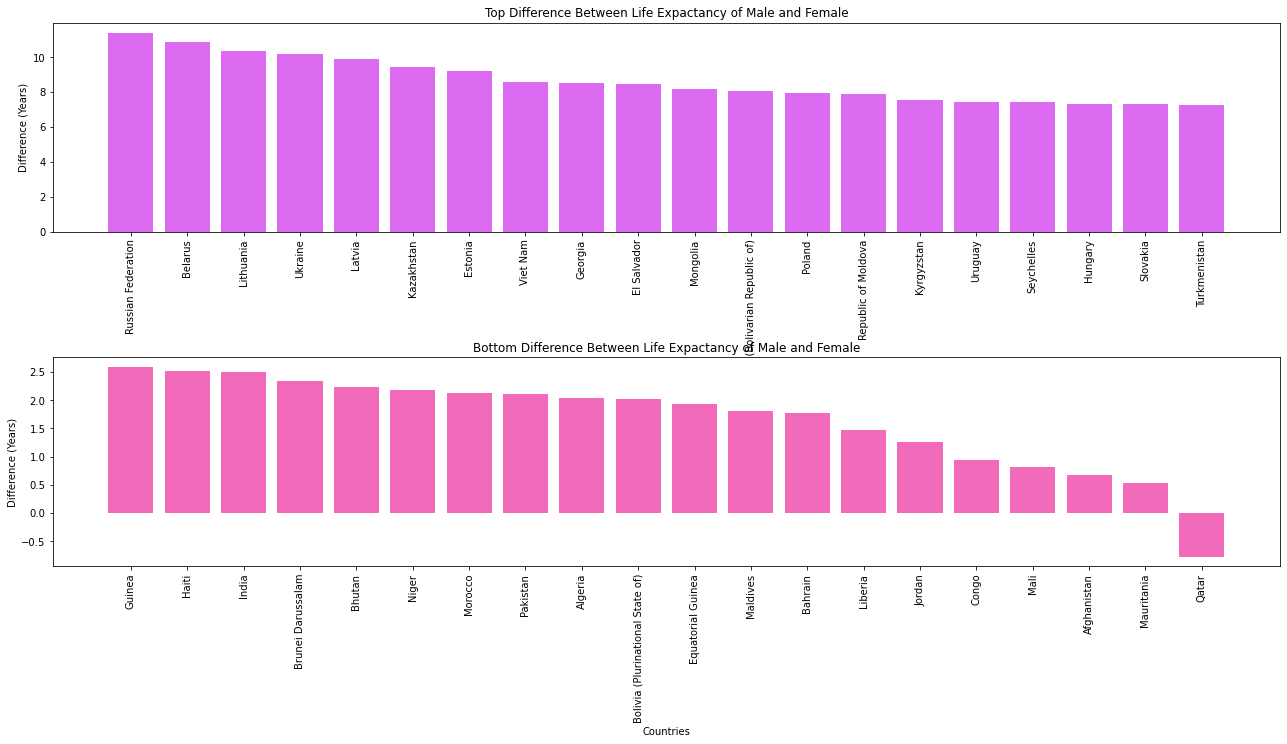

In [23]:
tempDataM = lifeExpectancy[lifeExpectancy['Dim1'] == 'Male']
tempDataF = lifeExpectancy[lifeExpectancy['Dim1'] == 'Female']
tempDataM.reset_index(inplace = True)
tempDataF.reset_index(inplace = True)
tempData = tempDataM.join(tempDataF, lsuffix = "_m", rsuffix = "_f")
tempData['LE_diff'] = tempData['First Tooltip_f'] - tempData['First Tooltip_m']
tempDataCountries = tempData.groupby("Location_m")['LE_diff'].mean()
tempDataCountriesTop = tempDataCountries.sort_values(ascending = False)[:20]
tempDataCountriesTop = tempDataCountriesTop.reset_index()

tempDataCountriesBot = tempDataCountries.sort_values()[:20]
tempDataCountriesBot = tempDataCountriesBot.reset_index()

fig = plt.figure(figsize = (22,10))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x = tempDataCountriesTop['Location_m'], height = tempDataCountriesTop['LE_diff'], color = "#dc6bf2")
ax1.set_xticklabels(tempDataCountriesTop['Location_m'], rotation=90)
ax1.set_ylabel("Difference (Years)")
ax1.title.set_text("Top Difference Between Life Expactancy of Male and Female")

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x = tempDataCountriesBot['Location_m'][::-1], height = tempDataCountriesBot['LE_diff'][::-1], color = "#f26bba")
ax2.title.set_text("Bottom Difference Between Life Expactancy of Male and Female")

plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.ylabel("Difference (Years)")
plt.subplots_adjust(hspace = 0.6)
plt.show()

Ideas:
1. plot where india stand in difference 
2. which country has maximum growth since 2000 to 2019


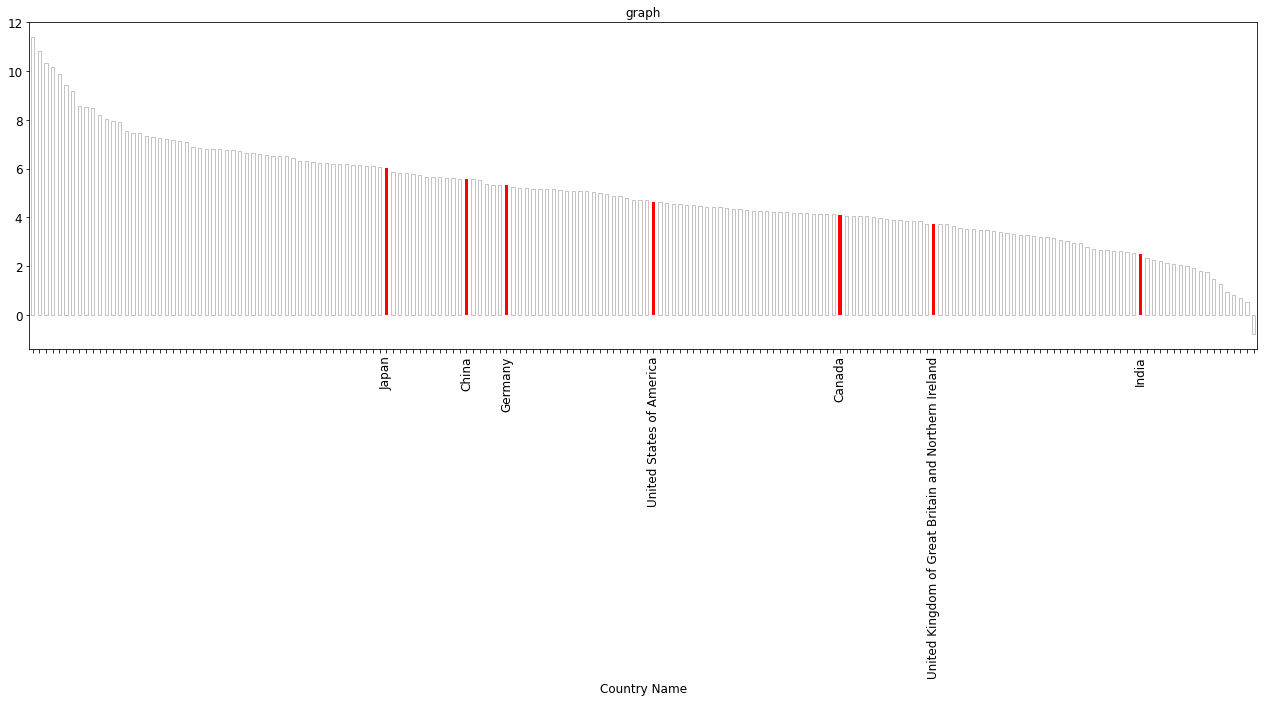

In [24]:
tempDataM = lifeExpectancy[lifeExpectancy['Dim1'] == 'Male']
tempDataF = lifeExpectancy[lifeExpectancy['Dim1'] == 'Female']
tempDataM.reset_index(inplace = True)
tempDataF.reset_index(inplace = True)
tempData = tempDataM.join(tempDataF, lsuffix = "_m", rsuffix = "_f")
tempData['LE_diff'] = tempData['First Tooltip_f'] - tempData['First Tooltip_m']
tempDataCountries = tempData.groupby("Location_m")['LE_diff'].mean()
tempDataCountries = tempDataCountries.sort_values(ascending = False)
tempDataCountries = tempDataCountries.reset_index()
tempDataCountries.set_index('Location_m',drop=True,inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']

ax_1 = tempDataCountries['LE_diff'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempDataCountries.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

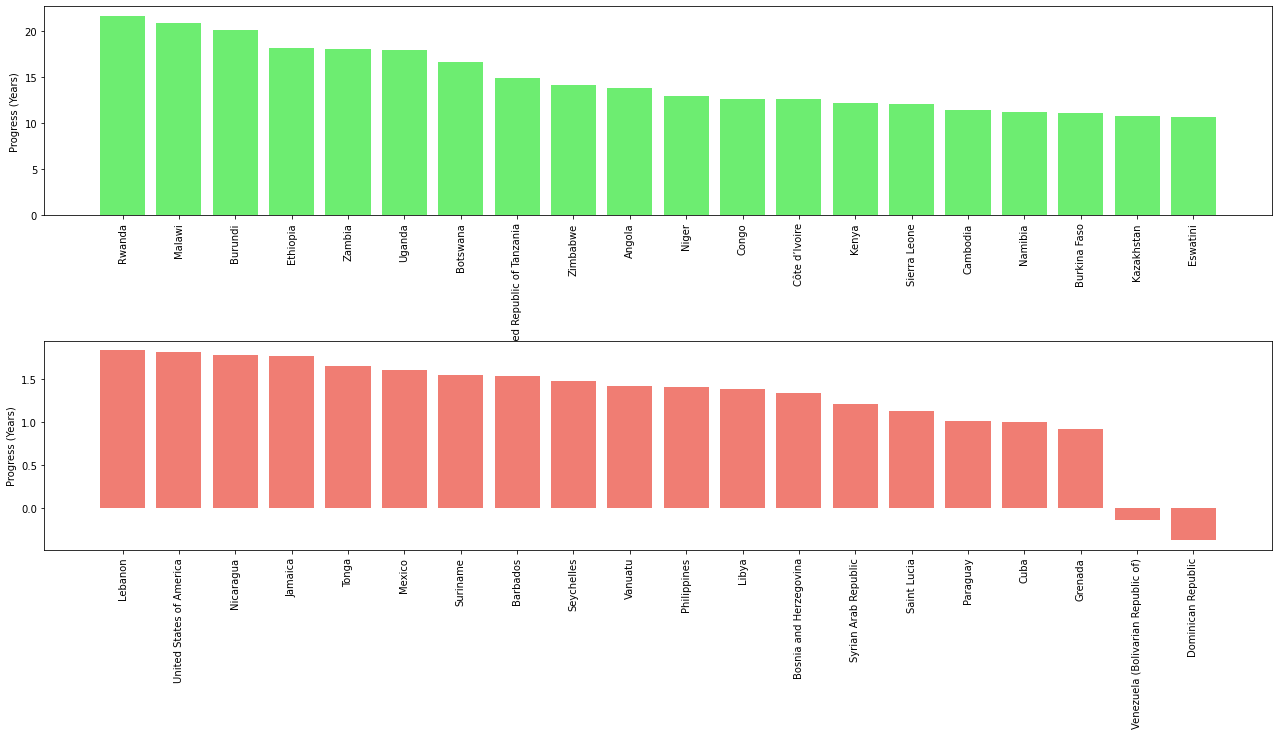

In [25]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmedTop = tempDataTrimmed[:20].copy()
tempDataTrimmedBot = tempDataTrimmed[-20:].copy()

fig = plt.figure(figsize=(22,10))

ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax1.bar(x=tempDataTrimmedTop['Location_00'], height=tempDataTrimmedTop['progress'], color = "#6ded71")
ax1.set_xticklabels(tempDataTrimmedTop['Location_00'], rotation=90)
ax1.set_ylabel("Progress (Years)")

ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)
ax2.bar(x=tempDataTrimmedBot['Location_00'], height=tempDataTrimmedBot['progress'], color = "#f07d73")
ax2.set_xticklabels(tempDataTrimmedBot['Location_00'], rotation=90)
ax2.set_ylabel("Progress (Years)")


plt.subplots_adjust(hspace = 0.6)
plt.show()

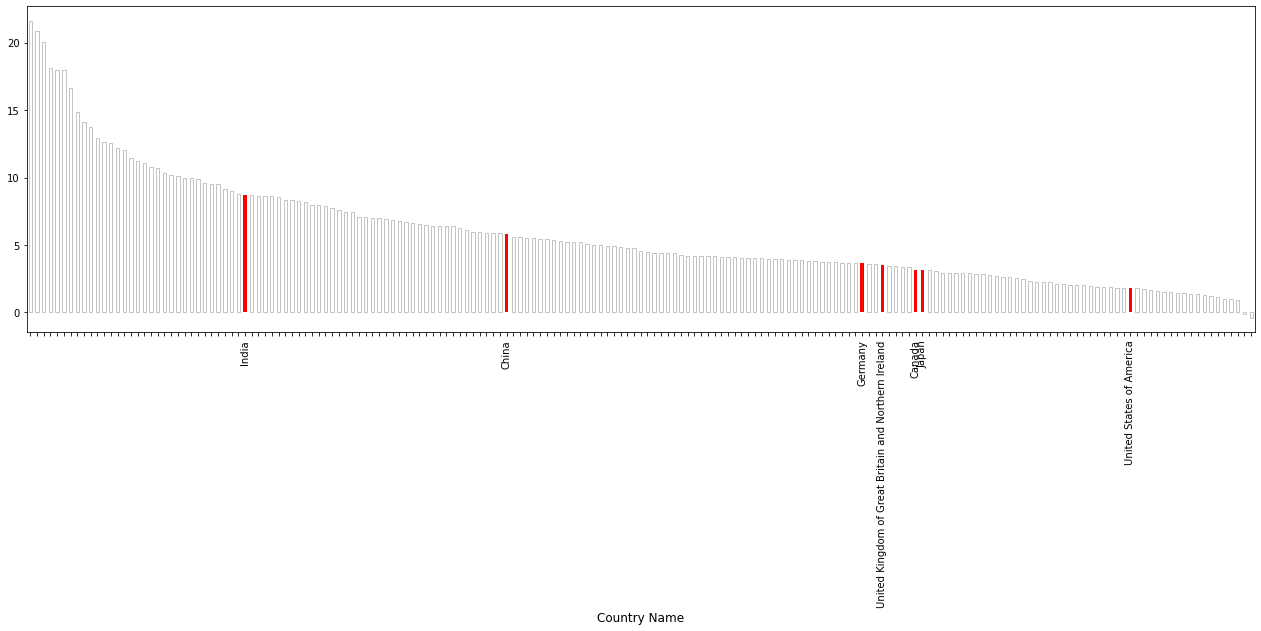

In [26]:
tempData2000 = lifeExpectancy[(lifeExpectancy['Period'] == 2000) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2019 = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == "Both sexes")]
tempData2000.reset_index(inplace = True)
tempData2019.reset_index(inplace = True)
tempData = tempData2000.join(tempData2019, lsuffix = "_00", rsuffix="_19")
tempData['progress'] = tempData['First Tooltip_19'] - tempData['First Tooltip_00']
tempDataTrimmed = tempData[['Location_00', 'progress']]
tempDataTrimmed.sort_values(by=['progress'], ascending=False, inplace=True)
tempDataTrimmed.set_index('Location_00', drop=True, inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']

ax_1 = tempDataTrimmed['progress'].plot(kind='bar', figsize=(22,6))
ax_1.set_xlabel("Country Name", fontsize=12)

for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempDataTrimmed.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Thanks For having a look. <br>Also have a look at my other notebook on same dataset https://www.kaggle.com/rockingromio/data-visualization-communicable-diseases